In [1]:
import zipfile

# Download zipfile of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-15 22:30:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 108.177.121.207, 142.250.103.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2023-10-15 22:30:03 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


We can see we have got a train and test folder.

Let's see what's inside one of them.

In [3]:
!ls pizza_steak/train/

pizza  steak


And how about inside the steak directory?

In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

Woah, a whole bunch of images. But how many?

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [7]:
# ANother way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # Turn our training path into a Python Path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Okay, so we have got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directoryy (we will view images from here)
  target_folder = target_dir + target_class

  # Get a random immage path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (384, 512, 3)


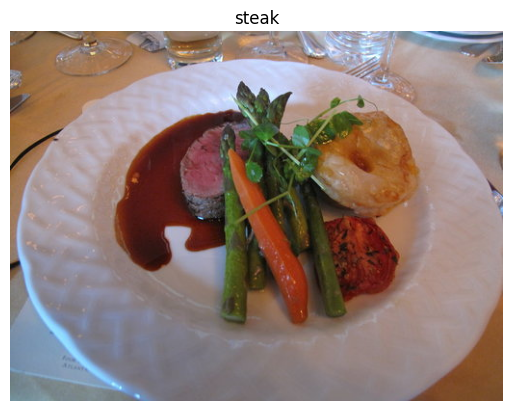

In [10]:
# View a random image from the training datset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

After going through a dozen or so images from different classes, you can start to get an idea of what we are working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might have nopticed we have been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [11]:
# View the img (actually just a big array/tensor)
img

array([[[103,  86,  68],
        [102,  85,  67],
        [109,  91,  71],
        ...,
        [170, 158, 170],
        [166, 154, 166],
        [163, 151, 163]],

       [[119, 102,  84],
        [116,  99,  81],
        [117,  99,  79],
        ...,
        [137, 139, 152],
        [125, 127, 140],
        [117, 119, 132]],

       [[123, 106,  88],
        [121, 104,  86],
        [119, 101,  81],
        ...,
        [ 73,  85,  99],
        [ 63,  79,  94],
        [ 59,  75,  90]],

       ...,

       [[115, 145, 156],
        [114, 144, 155],
        [115, 143, 155],
        ...,
        [117,  76,  44],
        [117,  76,  46],
        [117,  76,  46]],

       [[115, 145, 156],
        [115, 145, 156],
        [115, 145, 156],
        ...,
        [117,  76,  46],
        [116,  75,  45],
        [116,  75,  45]],

       [[115, 144, 158],
        [115, 144, 158],
        [117, 147, 158],
        ...,
        [117,  76,  46],
        [116,  75,  45],
        [115,  74,  44]]

In [12]:
# View the image
img.shape # returns (width, height, colour channels)

(384, 512, 3)

Looking at the image shape more closely, you will see it's in the form (Width, Height, Collour Channels).

In our case, the width and height vary but because we are dealing with colour images, the colour channels value is always 3. This is different values of red, green and blue (RGB) pixels.

You will notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determines what each class looks like.

In [13]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.40392157, 0.3372549 , 0.26666667],
        [0.4       , 0.33333333, 0.2627451 ],
        [0.42745098, 0.35686275, 0.27843137],
        ...,
        [0.66666667, 0.61960784, 0.66666667],
        [0.65098039, 0.60392157, 0.65098039],
        [0.63921569, 0.59215686, 0.63921569]],

       [[0.46666667, 0.4       , 0.32941176],
        [0.45490196, 0.38823529, 0.31764706],
        [0.45882353, 0.38823529, 0.30980392],
        ...,
        [0.5372549 , 0.54509804, 0.59607843],
        [0.49019608, 0.49803922, 0.54901961],
        [0.45882353, 0.46666667, 0.51764706]],

       [[0.48235294, 0.41568627, 0.34509804],
        [0.4745098 , 0.40784314, 0.3372549 ],
        [0.46666667, 0.39607843, 0.31764706],
        ...,
        [0.28627451, 0.33333333, 0.38823529],
        [0.24705882, 0.30980392, 0.36862745],
        [0.23137255, 0.29411765, 0.35294118]],

       ...,

       [[0.45098039, 0.56862745, 0.61176471],
        [0.44705882, 0.56470588, 0.60784314],
        [0.45098039, 0

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# 1. Create a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation="relu",
                           input_shape=(224,224,3)), # First layer specifies input shape
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2,2)
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu == tf.keras.activations.relu
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 125s 3s/step - loss: 0.6204 - accuracy: 0.6620 - val_loss: 0.4512 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 0.4743 - accuracy: 0.7833 - val_loss: 0.3619 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 118s 3s/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4065 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 131s 3s/step - loss: 0.4000 - accuracy: 0.8260 - val_loss: 0.3228 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 130s 3s/step - loss: 0.3589 - accuracy: 0.8540 - val_loss: 0.3141 - val_accuracy: 0.8780


Nice! After 5 epochs, our model beat the baseline score of ~ 50% accuracy

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

Since we have already fit a model, let's check out it's architecture.

In [16]:
# Check out the layers in our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   